PROBLEM STATEMENT: 

    Classify food into 10 classes. 

By:

    Prem S Rajanampalle, REI Intercollege, Dayalbagh, Agra

The dataset link

    : for binary classification: https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

    : for multi classification:https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

### Important Note: 

    Originally, the dataset FoodVision101 is between 101 classes.

    But just for explanation purpose, i only took 10 classes and tried to classify between them. 

    The whole credit for this program goes to Danial Bourke and his course on 
    "TensorFlow Developer Certificate in 2023: Zero to Mastery"

# Data Description
1. Import the required zip file using "from urllib.request import urlretrieve"
2. Give the url; extracall;close; # this will extract the zip file into our local directory - USE ZIPFILE libaryr
3. method 1: Inspect the data using os library
4. method 2: find out individually how many images there are... 
5. Get the number of class_names programmatically 
6. Visualize the image 

In [53]:
# 1. Import the required zip file using "from urllib.request import urlretrieve"
from urllib.request import urlretrieve 
urlretrieve("https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip","pizza_steak.zip")

('pizza_steak.zip', <http.client.HTTPMessage at 0x169a038d3a0>)

In [54]:
# 2. Importing zipfile 
import zipfile 
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [55]:
# 3. Inspect the dataset: Method 1: using os
import os 
# walk through the pizza_steak directory and list all the files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [56]:
# 4. Inspect the dataset: Method 2: indivually 
# For train
num_steak_train = len(os.listdir("pizza_steak/train/steak"))
num_pizza_train = len(os.listdir("pizza_steak/train/pizza"))
# For test
num_steak_test = len(os.listdir("pizza_steak/test/steak"))
num_pizza_test = len(os.listdir("pizza_steak/test/pizza"))

In [57]:
print("Number of Steak Images in Training set: ", num_steak_train)
print("Number of Pizza Images in Training set:", num_pizza_train)
print("Number of Steak Images in Testing set:", num_steak_test)
print("Number of Pizza Images in Testing set:", num_pizza_test)

Number of Steak Images in Training set:  750
Number of Pizza Images in Training set: 750
Number of Steak Images in Testing set: 250
Number of Pizza Images in Testing set: 250


In [58]:
# 5. obtaining Number of classes programmatically
# For the same, we need to import pathlib and numpy 
import pathlib 
import numpy as np 

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


That means there are only 2 classes in the dataset: pizza and steak

In [59]:
# 6. Visualize 
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


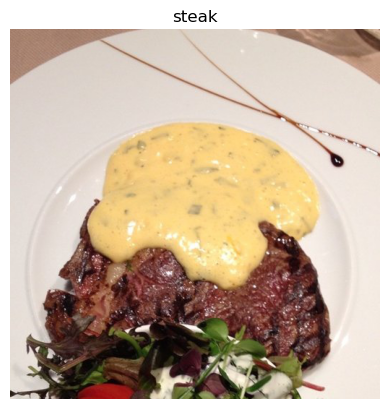

In [61]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

# Preprocessing 
NN works with values... we have to scale it between 0 to 1. Another word for the same is Normalize the pixel values. We are going to devide the pixel values by 255 as the maximum value is 255

In [62]:
# END TO END EXAMPLE

In [63]:
import tensorflow as tf
# For preprocessing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Processing - scalling and normalization 
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup path to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directoris 
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              batch_size = 32,
                                              target_size = (224, 224),
                                              class_mode = "binary",
                                              seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size = 32,
                                              target_size = (224, 224),
                                              class_mode = "binary",
                                              seed = 42)
 
# Building CNN Model 
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compiling the model
model_1.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['Accuracy'])
# Fitting the model 
history_1 = model_1.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 59s 1s/step - loss: 0.5808 - Accuracy: 0.7100 - val_loss: 0.5263 - val_Accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 59s 1s/step - loss: 0.4642 - Accuracy: 0.7840 - val_loss: 0.3822 - val_Accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.4509 - Accuracy: 0.8027 - val_loss: 0.3841 - val_Accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 59s 1s/step - loss: 0.3996 - Accuracy: 0.8373 - val_loss: 0.3476 - val_Accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 55s 1s/step - loss: 0.3108 - Accuracy: 0.8707 - val_loss: 0.3462 - val_Accuracy: 0.8400


In [64]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

# Multi-class Classification 
1. Understand the data
2. Preprocess the dataset
3. Create a model - baseline
4. fit the model 
5. evaluate model 
6. tuning hyperparameters & improving the model and reduce overfitting 
7. repeat until satisfied.

### Data description 
1. Import the required zip file using "from urllib.request import urlretrieve"
2. Give the url; extracall;close; # this will extract the zip file into our local directory - USE ZIPFILE libaryr
3. method 1: Inspect the data using os library
4. method 2: find out individually how many images there are... 
5. Get the number of class_names programmatically 
6. Visualize the image

In [67]:
# 1. Importing 

In [65]:
from urllib.request import urlretrieve 
urlretrieve("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip", "FoodVisionMulti.zip")

('FoodVisionMulti.zip', <http.client.HTTPMessage at 0x1698021b220>)

In [68]:
# 2. Unzipping 

In [66]:
# Unzipping the dataset
import zipfile
zip_ref_multi = zipfile.ZipFile("FoodVisionMulti.zip")
zip_ref_multi.extractall()
zip_ref_multi.close()

In [70]:
# 3. Method 1 - Inspect the dataset using os library 
import os
# Walk through the FoodVisionMulti dataset
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data\test'
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'
There are 10 directori

In [72]:
# 5.Obtaining number of classes programmatically:
import pathlib
import numpy as np 

data_dir_multi = pathlib.Path("10_food_classes_all_data/train/")
class_names = np.array(sorted([item.name for item in data_dir_multi.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [75]:
# 4. Method 2 - 
# For training 
num_chicken_curry_train = len(os.listdir("10_food_classes_all_data/train/chicken_curry"))
nun_chicken_wings_train = len(os.listdir("10_food_classes_all_data/train/chicken_wings"))
nun_fried_rice_train = len(os.listdir("10_food_classes_all_data/train/fried_rice"))
num_grilled_salmon_train = len(os.listdir("10_food_classes_all_data/train/grilled_salmon"))
nun_hamburger_train = len(os.listdir("10_food_classes_all_data/train/hamburger"))
nun_ice_cream_train = len(os.listdir("10_food_classes_all_data/train/ice_cream"))
num_pizza_train = len(os.listdir("10_food_classes_all_data/train/pizza"))
nun_ramen_train = len(os.listdir("10_food_classes_all_data/train/ramen"))
nun_steak_train = len(os.listdir("10_food_classes_all_data/train/steak"))
nun_sushi_train = len(os.listdir("10_food_classes_all_data/train/sushi"))
# For training 
num_chicken_curry_test = len(os.listdir("10_food_classes_all_data/test/chicken_curry"))
nun_chicken_wings_test = len(os.listdir("10_food_classes_all_data/test/chicken_wings"))
nun_fried_rice_test = len(os.listdir("10_food_classes_all_data/test/fried_rice"))
num_grilled_salmon_test = len(os.listdir("10_food_classes_all_data/test/grilled_salmon"))
nun_hamburger_test = len(os.listdir("10_food_classes_all_data/test/hamburger"))
nun_ice_cream_test = len(os.listdir("10_food_classes_all_data/test/ice_cream"))
num_pizza_test = len(os.listdir("10_food_classes_all_data/test/pizza"))
nun_ramen_test = len(os.listdir("10_food_classes_all_data/test/ramen"))
nun_steak_test = len(os.listdir("10_food_classes_all_data/test/steak"))
nun_sushi_test = len(os.listdir("10_food_classes_all_data/test/sushi"))

In [78]:
print("Training")
print(num_chicken_curry_train)
print(nun_chicken_wings_train)
print(nun_fried_rice_train)
print(num_grilled_salmon_train)
print(nun_hamburger_train)
print(nun_ice_cream_train)
print(num_pizza_train)
print(nun_ramen_train)
print(nun_steak_train)
print(nun_sushi_train)
print("Testing... ")
print(num_chicken_curry_test)
print(nun_chicken_wings_test)
print(nun_fried_rice_test)
print(num_grilled_salmon_test)
print(nun_hamburger_test)
print(nun_ice_cream_test)
print(num_pizza_test)
print(nun_ramen_test)
print(nun_steak_test)
print(nun_sushi_test)

Training
750
750
750
750
750
750
750
750
750
750
Testing... 
250
250
250
250
250
250
250
250
250
250


In [79]:
# 6. Visualizing 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


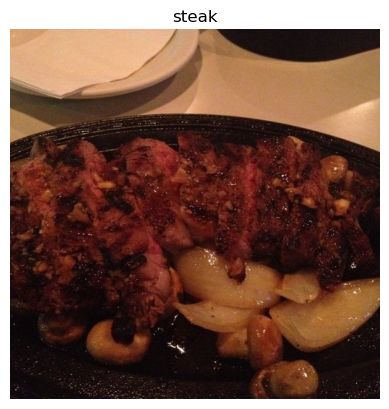

In [157]:
img = view_random_image(target_dir = "10_food_classes_all_data/train/", target_class = "steak")

### Preprocess the data
We need to reduce the dimensionality of the pixel values. Concretely, we need to devide the values by 255 as the maximum value of a pixel is 255

In [158]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [206]:
# Training directories
train_dir_multi = "10_food_classes_all_data/train/"
test_dir_multi = "10_food_classes_all_data/test/"    

In [207]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen_multi = ImageDataGenerator(rescale=1/255.)
test_datagen_multi = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_multi = train_datagen_multi.flow_from_directory(train_dir_multi,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data_multi = train_datagen_multi.flow_from_directory(test_dir_multi,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a model - baseline

In [208]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_multi = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_multi.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### Fit the model

In [222]:
# Fit the model
history_multi = model_multi.fit(train_data_multi, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data_multi),
                        validation_data=test_data_multi,
                        validation_steps=len(test_data_multi))

Epoch 1/5
235/235 [==============================] - 253s 1s/step - loss: 0.0246 - accuracy: 0.9925 - val_loss: 6.1803 - val_accuracy: 0.2840
Epoch 2/5
235/235 [==============================] - 248s 1s/step - loss: 0.0533 - accuracy: 0.9816 - val_loss: 6.2002 - val_accuracy: 0.2780
Epoch 3/5
235/235 [==============================] - 485s 2s/step - loss: 0.0394 - accuracy: 0.9891 - val_loss: 6.2146 - val_accuracy: 0.3004
Epoch 4/5
235/235 [==============================] - 246s 1s/step - loss: 0.0268 - accuracy: 0.9927 - val_loss: 6.9845 - val_accuracy: 0.2868
Epoch 5/5
235/235 [==============================] - 246s 1s/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 6.9754 - val_accuracy: 0.2964


### Evaluate

In [223]:
model_multi.evaluate(test_data_multi)

79/79 [==============================] - 19s 233ms/step - loss: 6.9754 - accuracy: 0.2964


[6.9753947257995605, 0.2964000105857849]

In [203]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


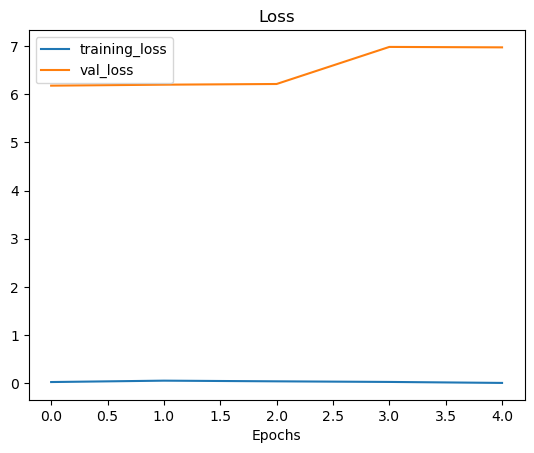

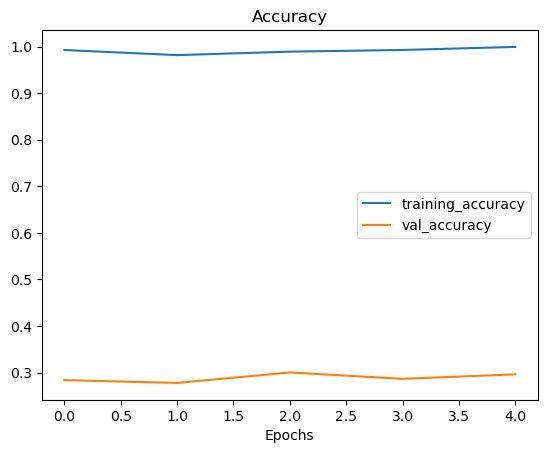

In [224]:
plot_loss_curves(history_multi)

### CONCLUSION -
from the first and second graphs, we can conclude that our model is overfitting. It is performing well with the training set 
but failing to generalize in the testing set. OVERFITTING!!!

Thing we can do:

0. Get more data
1. Simplify the model = remove some layers 
2. Data Augmentation - manipulate the data without making any changes to our original dataset
3. Transfer learning = yet to learn 

In [225]:
# Trying 1: Simplifying the dataset
model_1 = Sequential([
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_1.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [227]:
history_model_1 = model_1.fit(train_data_multi, # now 10 different classes 
                                    epochs=5,
                                    steps_per_epoch=len(train_data_multi),
                                    validation_data=test_data_multi,
                                    validation_steps=len(test_data_multi))

Epoch 1/5
235/235 [==============================] - 108s 453ms/step - loss: 2.1275 - accuracy: 0.2409 - val_loss: 1.9570 - val_accuracy: 0.2868
Epoch 2/5
235/235 [==============================] - 115s 486ms/step - loss: 1.8011 - accuracy: 0.3852 - val_loss: 1.9593 - val_accuracy: 0.3304
Epoch 3/5
235/235 [==============================] - 108s 460ms/step - loss: 1.4887 - accuracy: 0.5028 - val_loss: 2.0050 - val_accuracy: 0.3240
Epoch 4/5
235/235 [==============================] - 109s 465ms/step - loss: 1.0657 - accuracy: 0.6564 - val_loss: 2.1898 - val_accuracy: 0.2992
Epoch 5/5
235/235 [==============================] - 109s 464ms/step - loss: 0.6494 - accuracy: 0.8075 - val_loss: 2.4942 - val_accuracy: 0.3048


In [228]:
model_1.evaluate(test_data_multi)

79/79 [==============================] - 15s 191ms/step - loss: 2.4942 - accuracy: 0.3048


[2.4941680431365967, 0.30480000376701355]

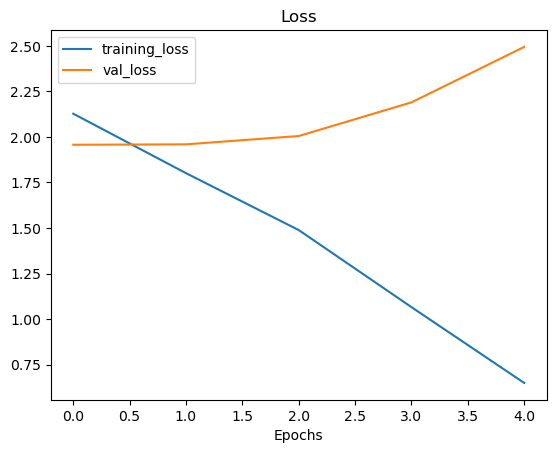

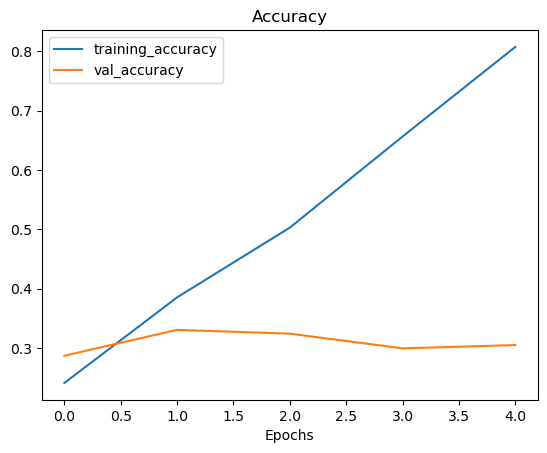

In [229]:
plot_loss_curves(history_model_1)

In [230]:
# Trying 2: Data Augmentation - rotating, shifting, flipping... the dataset without changing the original data. 
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                            rotation_range = 20,
                                            width_shift_range = 0.2,
                                            height_shift_range = 0.2,
                                            zoom_range = 0.2,
                                            horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir_multi,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [233]:
# Creating model
model_2 = tf.keras.models.clone_model(model_multi)

# Compiling... 
model_2.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])
history_model_2 = model_2.fit(train_data_augmented,
                       epochs = 5,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data_multi,
                       validation_steps = len(test_data_multi))

Epoch 1/5
235/235 [==============================] - 286s 1s/step - loss: 2.2008 - accuracy: 0.1899 - val_loss: 2.0234 - val_accuracy: 0.2772
Epoch 2/5
235/235 [==============================] - 296s 1s/step - loss: 2.0558 - accuracy: 0.2715 - val_loss: 1.9263 - val_accuracy: 0.3128
Epoch 3/5
235/235 [==============================] - 269s 1s/step - loss: 2.0149 - accuracy: 0.2871 - val_loss: 1.8823 - val_accuracy: 0.3520
Epoch 4/5
235/235 [==============================] - 282s 1s/step - loss: 1.9896 - accuracy: 0.3035 - val_loss: 1.9577 - val_accuracy: 0.3284
Epoch 5/5
235/235 [==============================] - 269s 1s/step - loss: 1.9670 - accuracy: 0.3160 - val_loss: 1.8396 - val_accuracy: 0.3656


In [234]:
model_2.evaluate(test_data_multi)

79/79 [==============================] - 20s 249ms/step - loss: 1.8396 - accuracy: 0.3656


[1.8395947217941284, 0.36559998989105225]

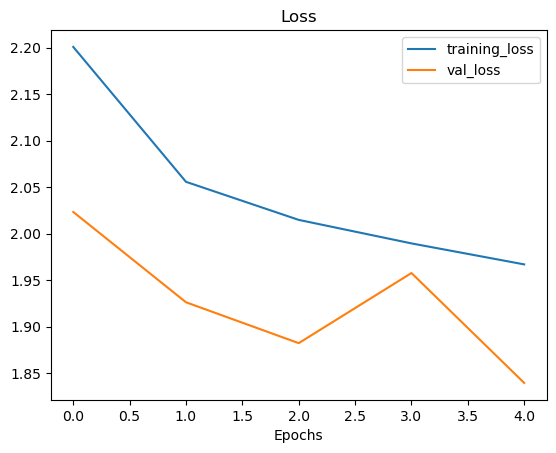

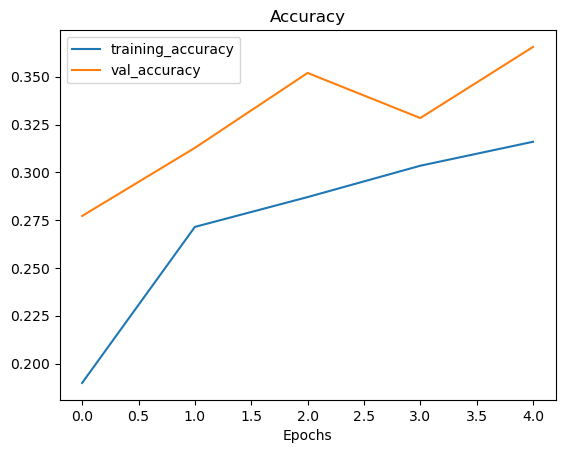

In [235]:
plot_loss_curves(history_model_2)

### repeat

In [236]:
train_datagen_augmented_2 = ImageDataGenerator(rescale = 1./255,
                                              rotation_range = 40,
                                              width_shift_range = 0.5,
                                              height_shift_range = 0.5,
                                              zoom_range = 0.5,
                                              horizontal_flip = True)

train_data_augmented_2 = train_datagen_augmented_2.flow_from_directory(directory = train_dir_multi,
                                                                      target_size = (224, 224),
                                                                      batch_size = 32,
                                                                      class_mode = "categorical")

# Creating model
model_3 = tf.keras.models.clone_model(model_2)

# Compiling... 
model_3.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])
history_model_3 = model_3.fit(train_data_augmented_2,
                             epochs = 15,
                             steps_per_epoch = len(train_data_augmented_2),
                             validation_data = test_data_multi,
                             validation_steps = len(test_data_multi))

Found 7500 images belonging to 10 classes.
Epoch 1/15
235/235 [==============================] - 501s 2s/step - loss: 2.2696 - accuracy: 0.1448 - val_loss: 2.2075 - val_accuracy: 0.1940
Epoch 2/15
235/235 [==============================] - 730s 3s/step - loss: 2.2385 - accuracy: 0.1715 - val_loss: 2.1577 - val_accuracy: 0.2016
Epoch 3/15
235/235 [==============================] - 537s 2s/step - loss: 2.2144 - accuracy: 0.1896 - val_loss: 2.1255 - val_accuracy: 0.2312
Epoch 4/15
235/235 [==============================] - 7302s 31s/step - loss: 2.1920 - accuracy: 0.2031 - val_loss: 2.0718 - val_accuracy: 0.2448
Epoch 5/15
235/235 [==============================] - 468s 2s/step - loss: 2.1753 - accuracy: 0.2135 - val_loss: 2.0324 - val_accuracy: 0.2736
Epoch 6/15
235/235 [==============================] - 496s 2s/step - loss: 2.1447 - accuracy: 0.2253 - val_loss: 1.9825 - val_accuracy: 0.3088
Epoch 7/15
235/235 [==============================] - 491s 2s/step - loss: 2.1271 - accuracy: 0.2

In [237]:
model_3.evaluate(test_data_multi)

79/79 [==============================] - 20s 249ms/step - loss: 1.8746 - accuracy: 0.3816


[1.874649167060852, 0.3815999925136566]

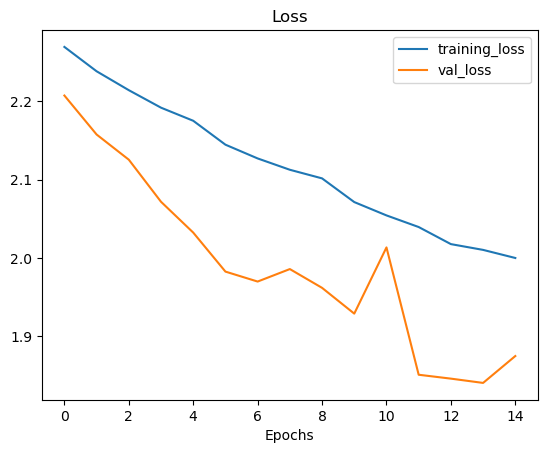

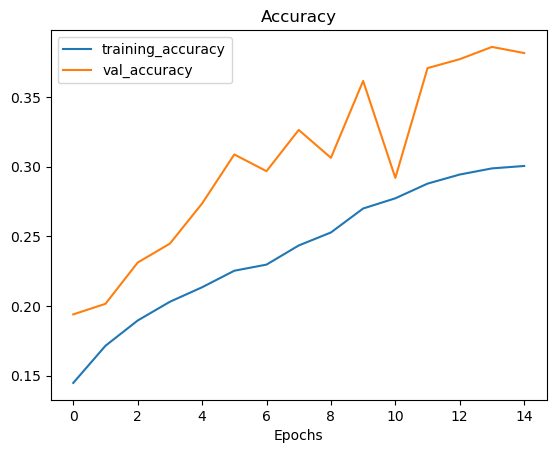

In [238]:
plot_loss_curves(history_model_3)